In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\Files\\Olympics\\athlete_events.csv')
region = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\Files\\Olympics\\noc_regions.csv')

In [3]:
#print(df.head(1))
#First let's take a look at our data set and anlalyze how clean and if there may be any changes 
#we would like to make to the data.
print(df.loc[0,:])

ID                                  1
Name                        A Dijiang
Sex                                 M
Age                                24
Height                            180
Weight                             80
Team                            China
NOC                               CHN
Games                     1992 Summer
Year                             1992
Season                         Summer
City                        Barcelona
Sport                      Basketball
Event     Basketball Men's Basketball
Medal                             NaN
Name: 0, dtype: object


In [4]:
df.groupby('Sex').aggregate(np.mean)
#this is interesting we can see that there are a few differences in the women
#and male columns.  First the age for women competitors is significantly
#lower than male.
#Second the average year of competitors is much larger.
#it states that women were able to enter in the 1900 Olympics but perhaps it represents
#the growing number of female sports in later years..

,ID,Age,Height,Weight,Year
Sex,,,,,
F,69956.722887,23.732881,167.839740,60.021252,1992.445748
M,67601.598304,26.277562,178.858463,75.743677,1973.046064


In [5]:
#Here we can see the differences between men and women in sports.  We should most likely split these groups up
#due to their substantial differences
#df.groupby('Team').aggregate(np.mean)

In [6]:
#Let's compare male characteristics in a certain sport and their change 
#over time.  First we should select a sport.  
df.groupby('Sport').count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,1,1,1,1,0,0,1,1,1,1,1,1,1,1
Alpine Skiing,8829,8829,8829,8751,6394,6350,8829,8829,8829,8829,8829,8829,8829,428
Alpinism,25,25,25,16,0,0,25,25,25,25,25,25,25,25
Archery,2334,2334,2334,2254,1945,1886,2334,2334,2334,2334,2334,2334,2334,353
Art Competitions,3578,3578,3578,3071,59,55,3578,3578,3578,3578,3578,3578,3578,156
Athletics,38624,38624,38624,37507,32907,32601,38624,38624,38624,38624,38624,38624,38624,3969
Badminton,1457,1457,1457,1457,1387,1362,1457,1457,1457,1457,1457,1457,1457,168
Baseball,894,894,894,893,846,847,894,894,894,894,894,894,894,336
Basketball,4536,4536,4536,4350,3881,3678,4536,4536,4536,4536,4536,4536,4536,1080


In [13]:
#Let's take a look at all the gold archery winners
gold_winners_m = df[(df['Medal'] == 'Gold') & (df['Sex'] == 'M') & (df['Sport'] == 'Archery')] 

print(gold_winners_m)

            ID                                   Name Sex   Age  Height  \
4878      2785                       Alphonse Allaert   M  44.0     NaN   
4879      2785                       Alphonse Allaert   M  44.0     NaN   
15143     8174          Jack Leonard "Jay" Barrs, Jr.   M  26.0   182.0   
30491    15721                      Julien Louis Brul   M  44.0     NaN   
30850    15893            George Philip "Phil" Bryant   M  26.0     NaN   
30851    15893            George Philip "Phil" Bryant   M  26.0     NaN   
42771    22068                        Edmond Cloetens   M   NaN     NaN   
42772    22068                        Edmond Cloetens   M   NaN     NaN   
42773    22068                        Edmond Cloetens   M   NaN     NaN   
50487    25970    Petrus Godefridus "Piet" de Brouwer   M  39.0     NaN   
51035    26231                      Edmond De Knibber   M   NaN     NaN   
51036    26231                      Edmond De Knibber   M   NaN     NaN   
51413    26437           

In [12]:
#Let's see how mens average weight of winners
#has changed in the sport of archery over time.
m_sorted = gold_winners_m.sort_values("Year", ascending=False)
m_sorted = m_sorted.dropna()
#print(weight_change)
print(m_sorted.head(1))

           ID         Name Sex   Age  Height  Weight         Team  NOC  \
119162  60313  Kim Woo-Jin   M  24.0   180.0    95.0  South Korea  KOR   

              Games  Year  Season            City    Sport  \
119162  2016 Summer  2016  Summer  Rio de Janeiro  Archery   

                     Event Medal  
119162  Archery Men's Team  Gold  


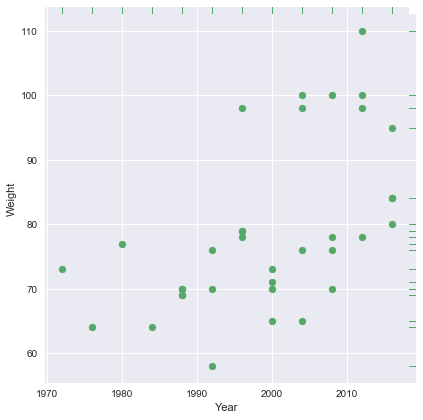

In [10]:
sns.set(style="darkgrid", color_codes=True)

grid = sns.JointGrid(x=m_sorted['Year'],y=m_sorted['Weight'] , space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

In [11]:
#Hear we can see the difference over time of the archery competition.
#and their weights.  It appears that weight was only starting to be collected
#in 1970. This limits our query but still it appears as though weights
#have been increasing over time.  

# Research Proposal

Here we start with our hypothesis: 

Gaining weight makes you a better archer.  
From the data we can see that on average male archers weight has gone up over the years.  Is there an ideal weight to be an archer?  

From the data shown above we can see that the weights of the archerers involved has increased since the 1970s. Let's explore this further. 

Does weight make you a better archer?

Our method for testing this solution would to randomly select from the batch of our next olympic athletes and place 50% as a control and 50% to bulk up above past their past average weight by 5% of their current average weight and a max gain of 8 pounds.  

This project should go under the name of Rambo vs. Robin Hood and should be implemented without the archer's knowledge by their coaches under the direction of the IOC.  Thus ensuring this experiments veracity.

This may include more weight lifting and physical conditioning than prior athletes.  We would then run olympic preliminaries as normal and be able to monitor the scoring of the athletes in group A and B.  We would create a ghost group A of their prior years competition data and be able to compare the discernable difference between the affected group and their ghost group from last year and determine how significant their variance in reality is.  

Now that we have created our three different groups.  We want to create a period of 2 years to properly accomodate the athletes adjusting to their new weights and see if the enforced gourging/bulking turns into a positive for the athletes or if they perform worse than their peers and past selves.  These 2 years would be broken out into 4 different sections of 6 months each and we would evaluate the data we have collected at these times.  

If the weight controlled athletes perform better than their peers within 2 standard deviations of the norm we will be able to comfortably say that an increased weight is beneficial for archers and implement a strict diet of McDonald's, Arbys, and 24 hour Fitness there after.  

Things that may help this analysis would be a deeper understanding of the top athletes biometrics and an understanding of their current diets. 